In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

## Задача 1

### Задача 1.1

In [123]:
house_data = pd.read_csv("kc-house-data.csv")

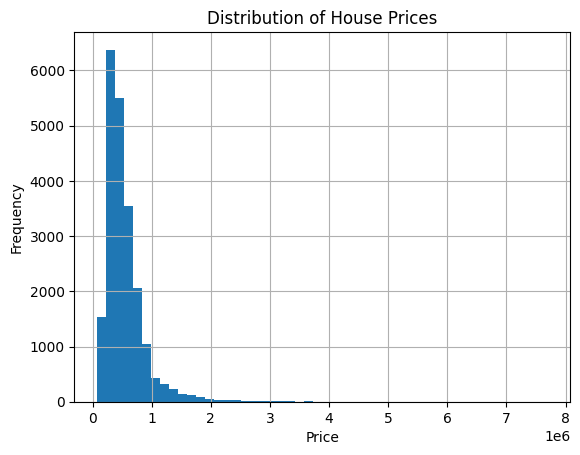

In [124]:
house_data["price"].hist(bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

### Задача 1.2

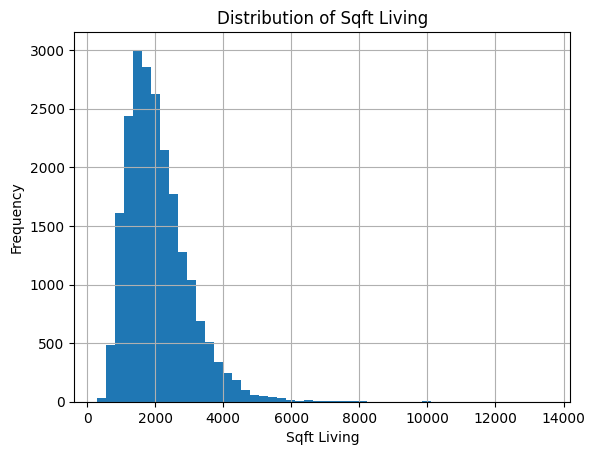

In [125]:
house_data["sqft_living"].hist(bins=50)
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.title("Distribution of Sqft Living")
plt.show()

### Задача 1.3

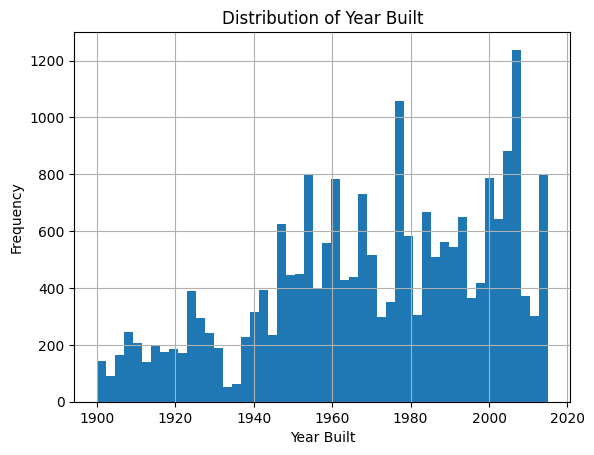

In [126]:
house_data["yr_built"].hist(bins=50)
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.title("Distribution of Year Built")
plt.show()

### Задача 2.1

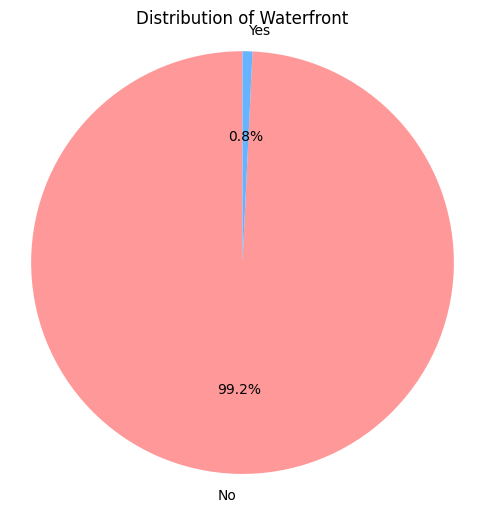

In [127]:
counts = house_data["waterfront"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=["No", "Yes"], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.title("Distribution of Waterfront")
plt.show()

### Задача 2.2

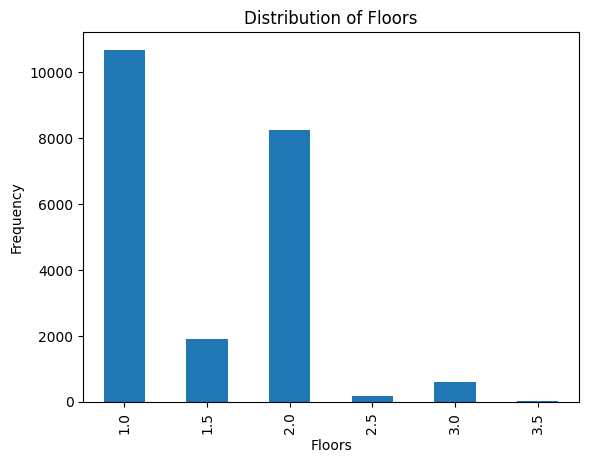

In [128]:
house_data["floors"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Floors")
plt.ylabel("Frequency")
plt.title("Distribution of Floors")
plt.show()

### Задача 2.3

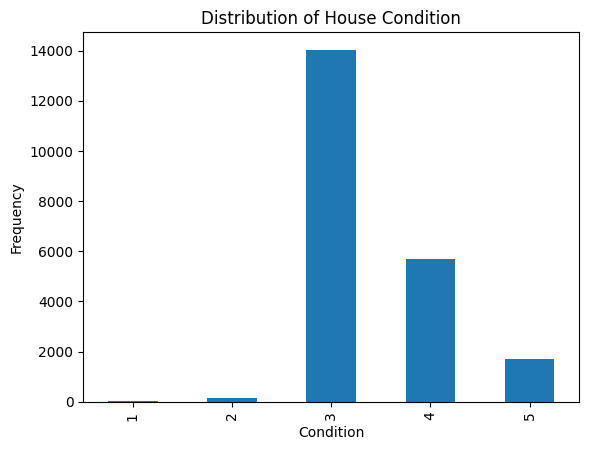

In [129]:
house_data["condition"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.title("Distribution of House Condition")
plt.show()

## Задача 3

### 3.1 Зависимость цены от количества спален.

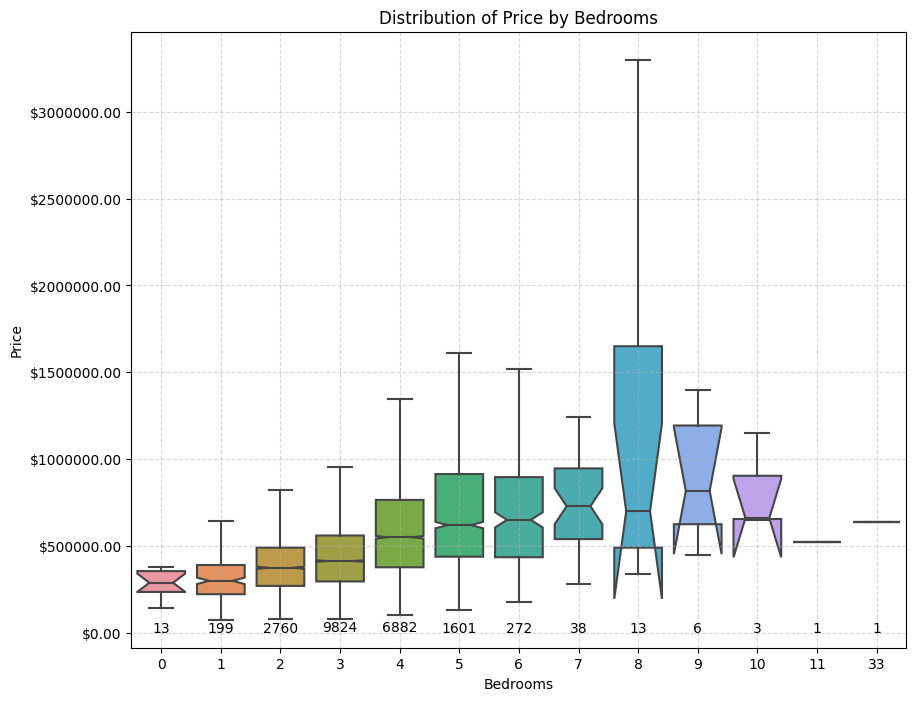

In [130]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='bedrooms', y='price', data=house_data, notch=True, showfliers=False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Distribution of Price by Bedrooms')
plt.gca().yaxis.set_major_formatter(locale.currency)
nobs = house_data['bedrooms'].value_counts().sort_index().values
pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], nobs[tick] + 10, nobs[tick],
             horizontalalignment='center', fontdict={'size': 10})
plt.show()

Видно, что с увеличением количества спален стоимость недвижимости возрастает.
Однако есть некоторые выбросы, например, дома с большим количеством спален, но низкой ценой.

### 3.2 Зависимость цены от количества ванных комнат

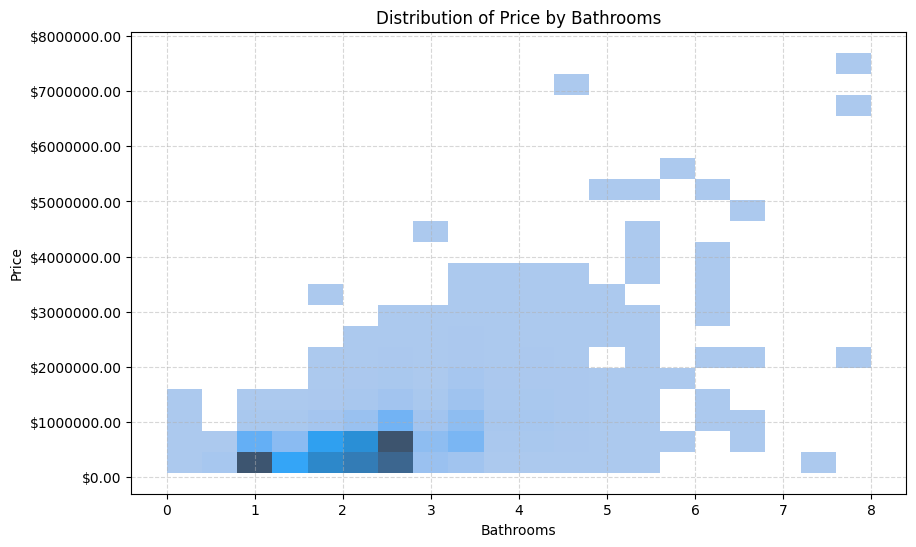

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(x='bathrooms', y='price', data=house_data, bins=20, kde=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Distribution of Price by Bathrooms')
plt.gca().yaxis.set_major_formatter(locale.currency)
plt.show()

Видно, что стоимость недвижимости обычно возрастает с увеличением количества ванных комнат.
Здесь также есть выбросы, которые могут быть обусловлены другими факторами, влияющими на цену.

### 3.3 Зависимость цены от жилой площади

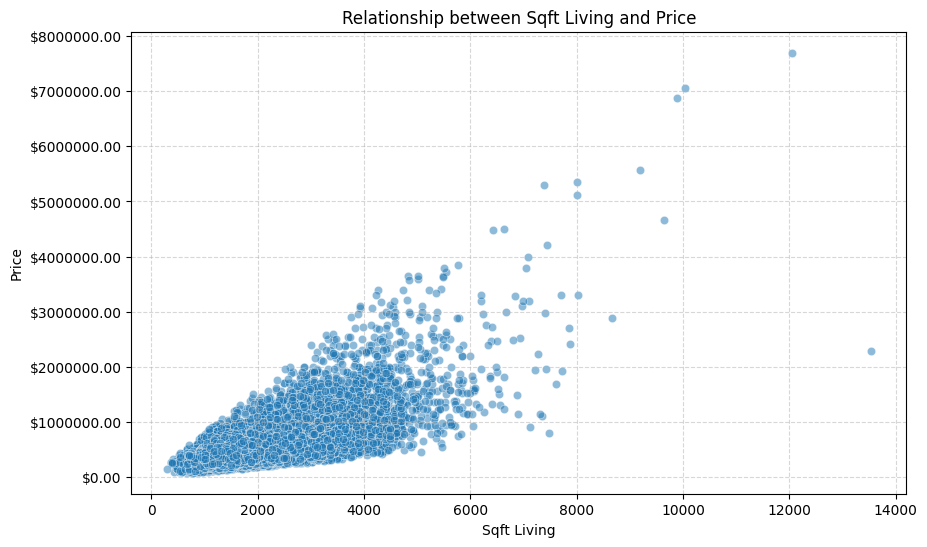

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_data, alpha=0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Relationship between Sqft Living and Price')
plt.gca().yaxis.set_major_formatter(locale.currency)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Видна положительная корреляция между общей площадью жилого помещения и стоимостью недвижимости.
Чем больше площадь жилого помещения, тем выше обычно стоимость недвижимости.

### 3.4 Зависимость цены от вида на набережную

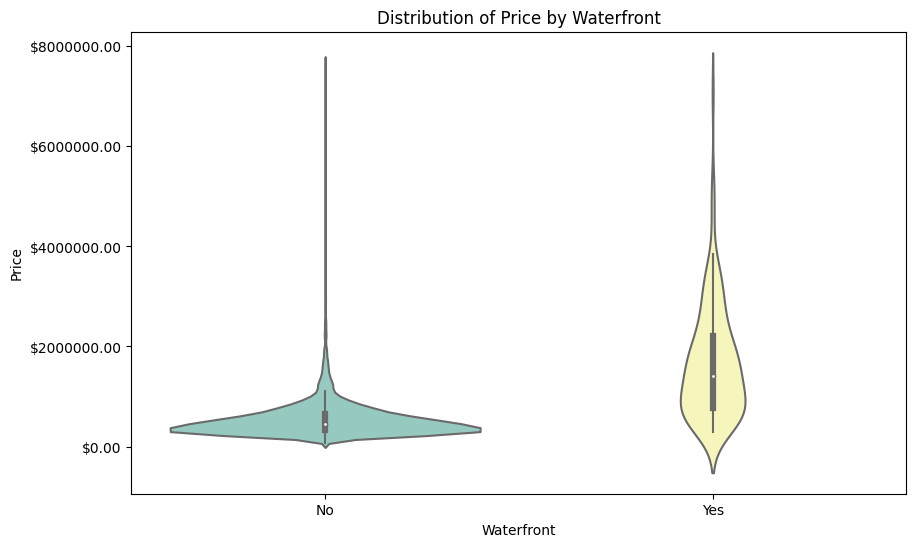

In [133]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='waterfront', y='price', data=house_data, palette='Set3')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Distribution of Price by Waterfront')
plt.gca().yaxis.set_major_formatter(locale.currency)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Дома с видом на набережную, как правило, имеют более высокую стоимость по сравнению с домами без такого вида.
Это может быть связано с привлекательностью расположения у воды и премиальностью таких объектов.

### 3.5 Зависимость цены от года постройки

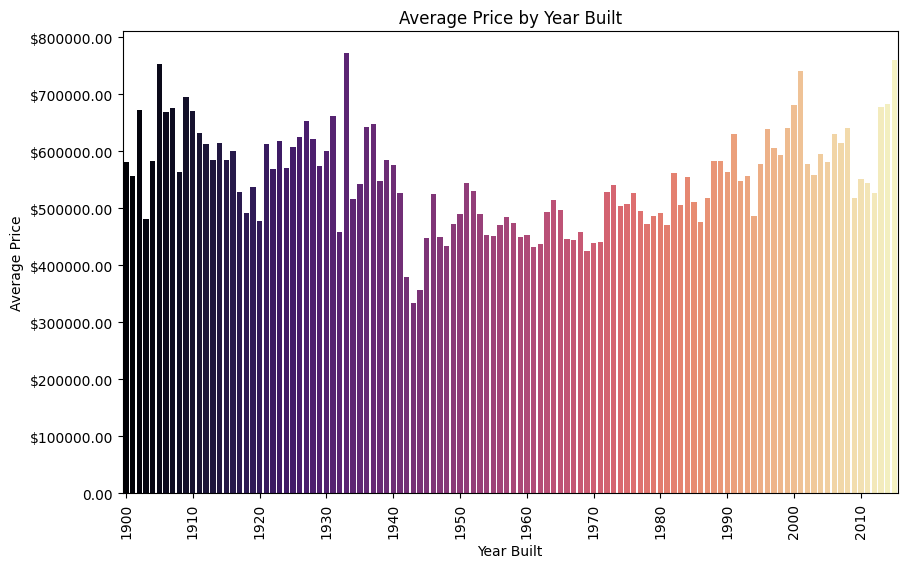

In [134]:
mean_prices = house_data.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='yr_built', y='price', data=mean_prices, palette='magma')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average Price by Year Built')
plt.gca().yaxis.set_major_formatter(locale.currency)
plt.xticks(range(0, len(mean_prices), 10), mean_prices['yr_built'].iloc[::10], rotation=90)
plt.show()

Мы видим, что средние цены недвижимости варьируются, но в целом имеют равномерное распределение.

### 3.6 Зависимость цены от категории качества

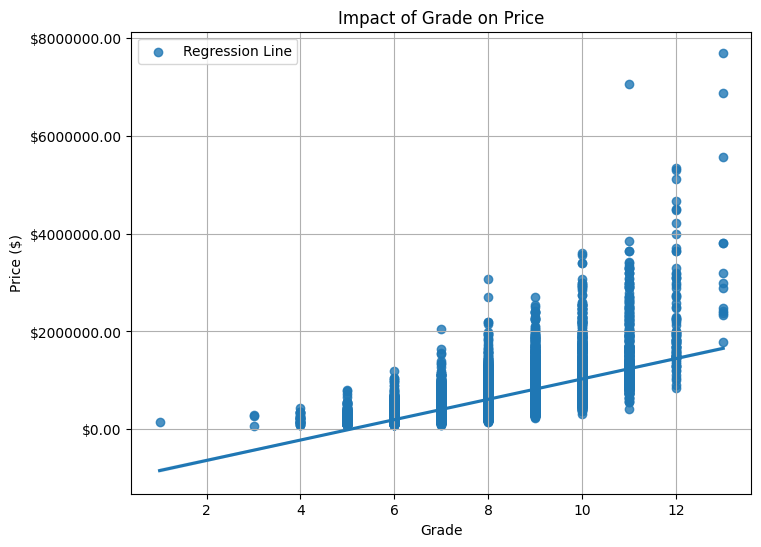

In [135]:
plt.figure(figsize=(8, 6))
sns.regplot(x='grade', y='price', data=house_data)
plt.title('Impact of Grade on Price')
plt.xlabel('Grade')
plt.ylabel('Price ($)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(locale.currency)
plt.legend(['Regression Line'])
plt.show()

Стоимость недвижимости обычно возрастает с увеличением категории качества дома.
Более высокая категория качества обычно соответствует более высокой цене.

### 3.7 Распределение цен на карте

In [136]:
m = folium.Map(location=[house_data['lat'].mean(), house_data['long'].mean()], zoom_start=10)
heat_data = house_data[['lat', 'long', 'price']].values
HeatMap(heat_data, min_opacity=0.3).add_to(m)
m